Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,66.34,2021-11-29,2022-10-14,2023-05-25,389
1,37.55,2020-02-19,2020-03-16,2020-05-11,59
2,27.05,2024-06-18,2024-08-07,2024-10-14,85
3,24.38,2021-02-16,2021-03-08,2021-04-13,41
4,19.79,2024-03-25,2024-04-19,2024-05-21,42


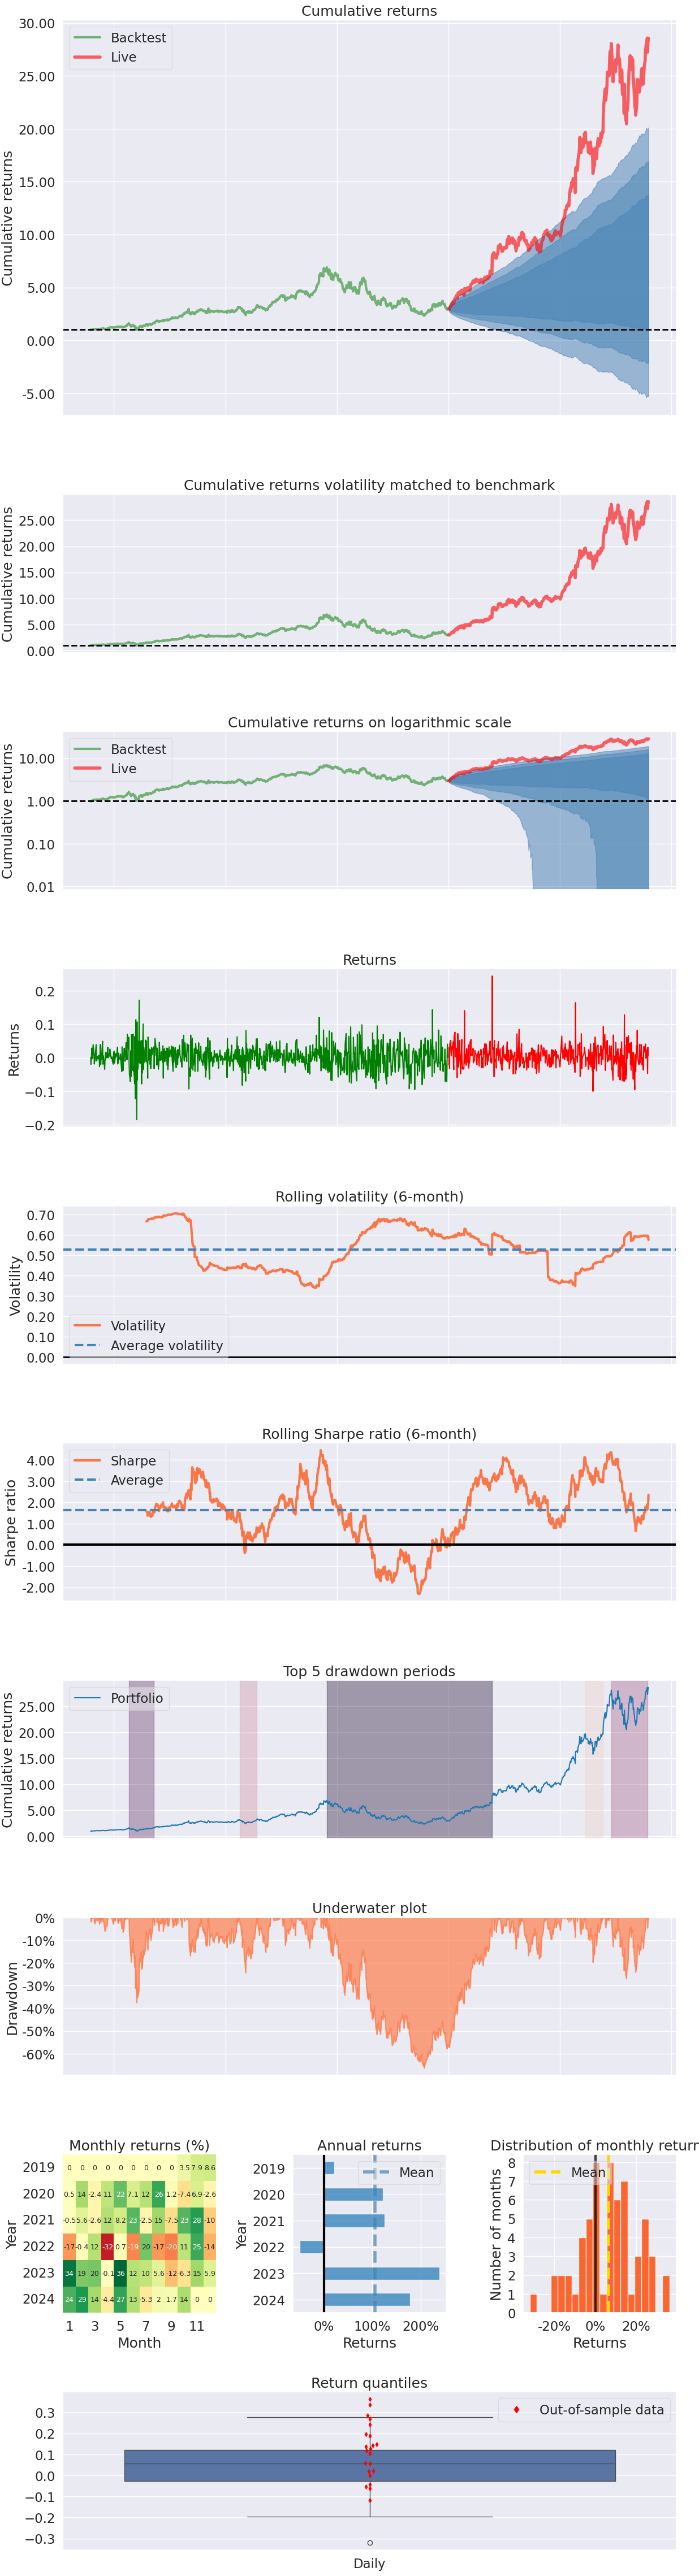

In [4]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings, pytz
warnings.filterwarnings('ignore')
import pandas_ta as ta
import pandas as pd
from datetime import datetime

symbol = "NVDA"
df = pd.DataFrame()
df = df.ta.ticker(symbol)

stock_rets = df["Close"].pct_change().dropna().tail(252*5)
stock_rets.name = symbol


# stock_rets = pf.utils.get_symbol_rets(symbol)
stock_rets.index = stock_rets.index.map(lambda x: x.strftime("%Y-%m-%d"))
# stock_rets.index = stock_rets.index.map(lambda x: pytzdatetime.strptime(x, "%Y-%m-%d"))
stock_rets.index = stock_rets.index.map(lambda x: pytz.timezone("UTC").localize(datetime.strptime(x, "%Y-%m-%d")))


x = pf.create_returns_tear_sheet(stock_rets, live_start_date='2023-01-01')

In [128]:
import pandas as pd
import pandas_ta as ta

symbol = "NVDA"
df = pd.DataFrame()
df = df.ta.ticker(symbol)
df_q = df.ta.ticker("SPY")

stock_rets2 = df["Close"].pct_change().dropna().tail(252)
stock_rets2.name = symbol

base_rets = df_q["Close"].pct_change().dropna().tail(252)

# stock_rets = stock_rets.to_frame()
# stock_rets = pf.utils.get_symbol_rets('NVDA')
stock_rets2.tail(),

(Date
 2024-10-14 00:00:00-04:00    0.024258
 2024-10-15 00:00:00-04:00   -0.046860
 2024-10-16 00:00:00-04:00    0.031307
 2024-10-17 00:00:00-04:00    0.008915
 2024-10-18 00:00:00-04:00    0.007814
 Name: NVDA, dtype: float64,)

In [129]:
import pytz
from datetime import datetime

base_rets.index = base_rets.index.map(lambda x: x.strftime("%Y-%m-%d"))
base_rets.index = base_rets.index.map(lambda x: datetime.strptime(x, "%Y-%m-%d"))
stock_rets2.index = stock_rets2.index.map(lambda x: x.strftime("%Y-%m-%d"))
stock_rets2.index = stock_rets2.index.map(lambda x: datetime.strptime(x, "%Y-%m-%d"))
# stock_rets2.index[0].astimezone(pytz.timezone("UTC"))
# pytz.timezone("UTC").astimezone(stock_rets2.index[0].date()), base_rets.index[0]

In [136]:
# datetime.strptime(stock_rets2.index[0], "%Y-%m-%d")
pd.__version__

'2.2.2'

In [53]:
%matplotlib inline
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('META')

# show sharpe ratio
qs.stats.sharpe(stock_rets2)

# or using extend_pandas() :)
stock_rets2.sharpe()

[*********************100%%**********************]  1 of 1 completed


2.549970539430386

In [130]:
# qs.plots.snapshot(stock_rets2, title='Facebook Performance', show=True)
# qs.reports.html(stock, "SPY")
x = qs.reports.metrics(stock_rets2, base_rets)
# print(dir(x))
# can also be called via:
# stock.plot_snapshot(title='Facebook Performance', show=True)

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2023-10-19   2023-10-19
End Period          2024-10-18   2024-10-18
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   37.72%       227.14%
CAGR﹪              24.73%       126.66%

Sharpe              2.66         2.55
Prob. Sharpe Ratio  99.49%       99.54%
Sortino             4.07         4.17
Sortino/√2          2.87         2.95
Omega               1.54         1.54

Max Drawdown        -8.41%       -27.05%
Longest DD Days     64           114

Gain/Pain Ratio     0.56         0.54
Gain/Pain (1M)      4.8          13.84

Payoff Ratio        0.94         0.94
Profit Factor       1.56         1.54
Common Sense Ratio  1.48         1.69
CPC Index           0.89         0.85
Tail Ratio          0.95         1.09
Outlier Win Ratio   8.94         2.09
Outlier Loss Ratio  7.52         1.92

MTD                 1.89%        13.64%
3M      

/Users/shenggao/miniconda3/envs/llm311/lib/python3.11/site-packages/quantstats/stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = _utils._prepare_returns(returns, rf).resample(resolution).sum()
